# Scenario C - Peak Number Variation (results evaluation)

This file is used to evaluate the inference (numerical) results.

The model used in the inference of the parameters is formulated as follows: 

\begin{equation}
\large y = f(x) = \sum\limits_{m=1}^M \big[A_m \cdot e^{-\frac{(x-\mu_m)^2}{2\cdot\sigma_m^2}}\big] + \epsilon
\end{equation}

In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm
import arviz as az
import seaborn as sns

#az.style.use('arviz-darkgrid')

print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.8


## Load results summary

In [5]:
# load results from disk
df = pd.read_csv('./output_adapt_diag/scenario_peaks.csv')
df.index += 1
#df.sort_values(by=['waic'], ascending=False)
df

,r_hat,mcse,ess,bfmi,r2,waic,epsilon,epsilon_real,model,peaks
1,1.00,0.000000,3929.428571,0.954804,0.999680,-4754.801510,0.049517,0.05,2,2
2,1.00,0.000000,5300.714286,1.049510,0.999554,-3950.540267,0.064688,0.05,2,2
3,1.00,0.000000,4278.571429,1.091909,0.999392,-3785.784443,0.068167,0.05,2,2
4,1.00,0.000000,3959.000000,1.051070,0.999846,-4684.131350,0.050658,0.05,2,2
5,1.00,0.000000,4824.000000,1.133247,0.999518,-3341.513910,0.078943,0.05,2,2
...,...,...,...,...,...,...,...,...,...,...
76,1.00,0.000188,5131.875000,1.042221,0.998972,-991.914686,0.172256,0.05,5,5
77,1.00,0.000000,4314.812500,1.083740,0.999893,-4150.327292,0.060371,0.05,5,5
78,1.31,4.493625,2291.062500,0.988276,0.999798,-2840.819256,0.093411,0.05,5,5
79,1.00,0.000687,2866.500000,1.019639,0.999941,-4682.102306,0.050504,0.05,5,5


In [6]:
peak_numbers = [2, 3, 4, 5]
waic_mat = np.full((4,4),0.0)
rhat_mat = np.full((4,4),0.0)
r2_mat = np.full((4,4),0.0)
bfmi_mat = np.full((4,4),0.0)
mcse_mat = np.full((4,4),0.0)
noise_mat = np.full((4,4),0.0)
ess_mat = np.full((4,4),0.0)

ldata = []

for i, val in enumerate(peak_numbers):
    ret1 = df.loc[(df['model'] == val)]
    for j, val in enumerate(peak_numbers):
        ret2 = ret1.loc[(ret1['peaks'] == val)]
        waic_mat[i][j] = ret2['waic'].mean()
        rhat_mat[i][j] = ret2['r_hat'].mean()
        r2_mat[i][j] = ret2['r2'].mean()
        bfmi_mat[i][j] = ret2['bfmi'].mean()
        mcse_mat[i][j] = ret2['mcse'].mean()
        noise_mat[i][j] = ret2['epsilon'].mean()
        ess_mat[i][j] = ret2['ess'].mean()
        #print(i, j, waic_mat[i][j], rhat_mat[i][j])
        
ldata += [waic_mat, rhat_mat, r2_mat, bfmi_mat, mcse_mat, noise_mat, ess_mat]

In [7]:
def heatmap(data, title, color, fsize, fname="./heatmap", precision=".3f"):
    
    sns.set(font_scale=1.3)

    yticks = ["m_2p", "m_3p", "m_4p", "m_5p"]
    xticks = ["d_2p", "d_3p", "d_4p", "d_5p"]

    plt.figure(figsize=fsize)
    plt.title(title)

    sns.heatmap(data, annot=True, fmt=precision, linewidths=1, square=True,
                    cmap=color, cbar=False, xticklabels=xticks, yticklabels=yticks)

    plt.yticks(rotation=0)
    plt.xticks(rotation=0)
    
    plt.savefig(fname + '.png', dpi=150)

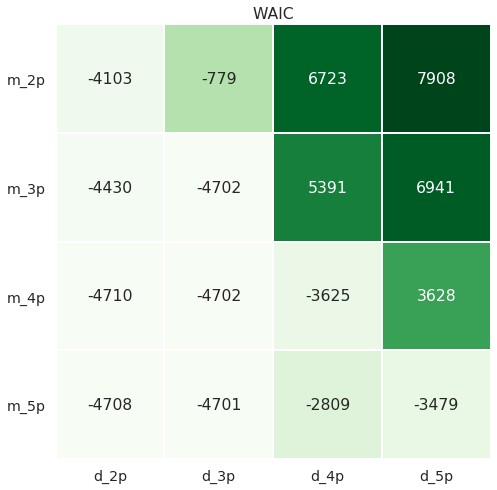

In [8]:
figs=(8,8)
col_r = "Greens_r"
col = "Greens"

heatmap(waic_mat, "WAIC", col, figs, "hmap_waic", ".0f")

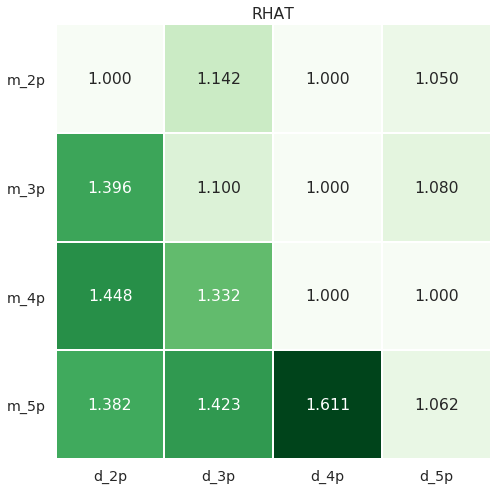

In [9]:
heatmap(rhat_mat, "RHAT", col, figs, "hmap_rhat")

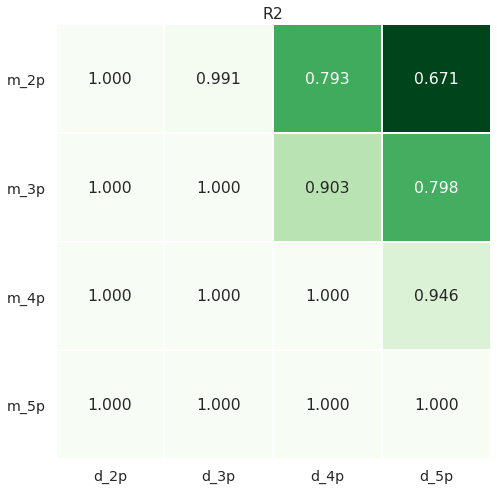

In [10]:
heatmap(r2_mat, "R2", col_r, figs, "hmap_r2")

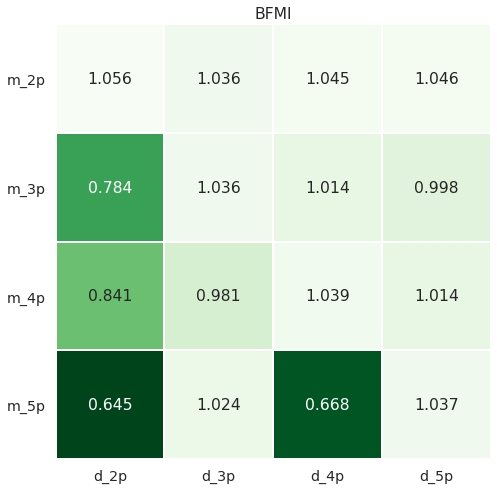

In [11]:
heatmap(bfmi_mat, "BFMI", col_r, figs, "hmap_bfmi")

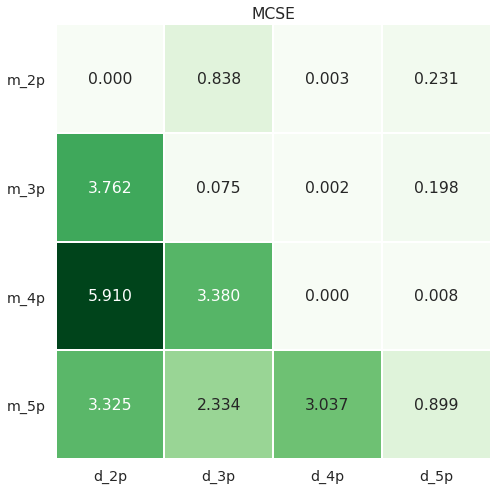

In [12]:
heatmap(mcse_mat, "MCSE", col, figs, "hmap_mcse")

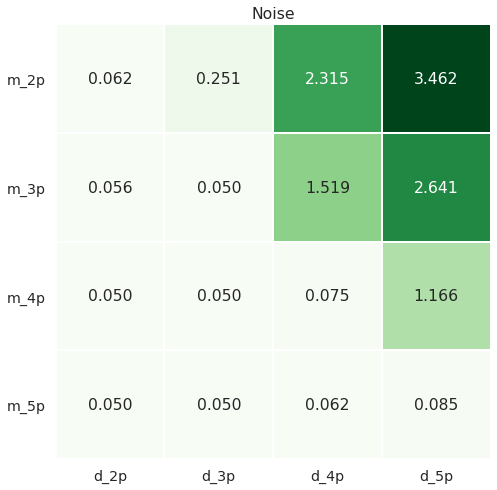

In [13]:
heatmap(noise_mat, "Noise", col, figs, "hmap_noise")

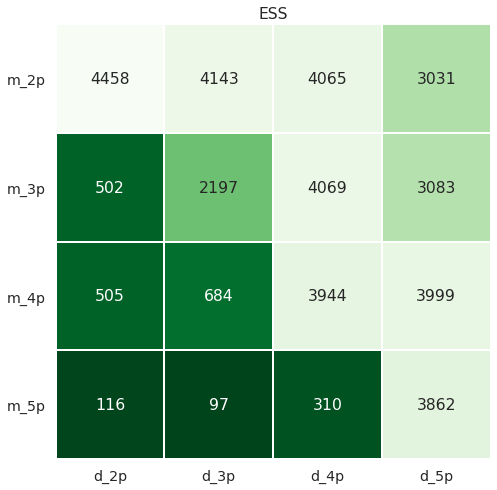

In [14]:
heatmap(ess_mat, "ESS", col_r, figs, "hmap_ess", ".0f")